In [1]:
import mne 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
from scipy.stats import pearsonr

from sklearn.preprocessing import MinMaxScaler

from feature_extraction import *
from pre_processing import *
from plotting import *
from machine_learning import *
from post_processing import *

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go

In [2]:
df = pd.read_csv('main_learning_df_val_data_iqr.csv')
df

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,min_amp,range_amp,abs_psd_delta,rel_psd_delta,...,rel_psd_theta,abs_psd_alpha,rel_psd_alpha,abs_psd_beta,rel_psd_beta,pfd,svd_entropy,pges,subject,session
0,0,Fp2-F8,0.000004,0.000005,0.000004,0.000020,2.644489e-08,0.000020,6.777398e-12,0.154005,...,0.048528,6.915946e-13,0.015715,4.132227e-13,0.009390,0.604202,3.152387,0,10,1
1,0,T8-F8,0.000004,0.000006,0.000005,0.000029,2.644489e-08,0.000029,1.430437e-11,0.135915,...,0.021991,2.193711e-12,0.020844,5.670560e-13,0.005388,0.602365,3.147823,0,10,1
2,1,Fp2-F8,0.000004,0.000004,0.000003,0.000021,2.644489e-08,0.000021,1.267215e-12,0.047744,...,0.021991,5.720618e-13,0.021553,4.264180e-13,0.016066,0.612299,3.224458,0,10,1
3,1,T8-F8,0.000004,0.000005,0.000004,0.000022,2.644489e-08,0.000022,6.944470e-13,0.033195,...,0.012908,4.300118e-13,0.020555,7.021035e-13,0.033561,0.598881,3.283837,0,10,1
4,2,Fp2-F8,0.000004,0.000005,0.000003,0.000021,2.644489e-08,0.000021,3.924381e-12,0.132804,...,0.035090,3.291690e-13,0.011139,5.162434e-13,0.017470,0.605626,3.211713,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38311,43,T8-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,1.361800e-12,0.175617,...,0.014400,3.176139e-13,0.007154,1.208165e-13,0.015953,0.650698,3.056865,0,15,2
38312,44,Fp2-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,1.089951e-12,0.047464,...,0.039003,5.419325e-13,0.023600,1.208165e-13,0.024866,0.650698,3.223789,0,15,2
38313,44,T8-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,1.388377e-12,0.067745,...,0.046326,6.094300e-13,0.029737,1.208165e-13,0.019066,0.650698,3.179301,0,15,2
38314,45,Fp2-F8,0.000003,0.000003,0.000002,0.000012,6.388476e-09,0.000012,2.304743e-12,0.071184,...,0.012134,5.604659e-13,0.017310,1.208165e-13,0.009539,0.650698,3.170431,0,15,2


In [24]:
ref = pd.read_csv('main_learning_df_npc00_full_10post_iqr.csv')
ref

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,min_amp,range_amp,abs_psd_delta,rel_psd_delta,...,rel_psd_theta,abs_psd_alpha,rel_psd_alpha,abs_psd_beta,rel_psd_beta,pfd,svd_entropy,pges,subject,session
0,0,FP2-F8,0.000009,0.000010,0.000006,0.000026,5.756294e-08,0.000026,5.208090e-12,0.191276,...,0.039635,5.755831e-13,0.021139,1.544788e-13,0.005673,0.604202,2.375337,0,aaq,6.0
1,0,T4-F8,0.000005,0.000005,0.000003,0.000015,6.763491e-09,0.000015,2.228358e-12,0.119239,...,0.047518,4.747604e-13,0.025404,2.105636e-13,0.011267,0.611754,2.797425,0,aaq,6.0
2,1,FP2-F8,0.000010,0.000011,0.000007,0.000030,5.756294e-08,0.000030,9.065146e-12,0.240700,...,0.023694,6.086431e-13,0.016161,1.325314e-13,0.003519,0.607588,2.342041,0,aaq,6.0
3,1,T4-F8,0.000004,0.000005,0.000003,0.000014,5.936370e-09,0.000014,1.232138e-12,0.115955,...,0.038540,2.178675e-13,0.020503,1.367948e-13,0.012874,0.606109,2.696113,0,aaq,6.0
4,2,FP2-F8,0.000010,0.000010,0.000006,0.000030,5.756294e-08,0.000030,4.393930e-11,0.266820,...,0.030812,7.622206e-13,0.004629,1.386361e-13,0.000842,0.605147,2.392857,0,aaq,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33083,73,T8-F8,0.000008,0.000009,0.000006,0.000033,7.704703e-09,0.000033,6.842686e-12,0.124992,...,0.010545,3.889102e-13,0.007104,1.233815e-12,0.022537,0.598881,3.037407,0,P9,1.0
33084,74,Fp2-F8,0.000020,0.000026,0.000019,0.000071,5.023759e-08,0.000071,5.815164e-12,0.326660,...,0.002544,1.702840e-13,0.000239,1.970360e-13,0.000277,0.598881,3.178054,0,P9,1.0
33085,74,T8-F8,0.000009,0.000012,0.000011,0.000050,5.023759e-08,0.000050,1.212774e-11,0.196806,...,0.003705,1.632194e-13,0.002649,7.042499e-13,0.011428,0.600593,3.178054,0,P9,1.0
33086,75,Fp2-F8,0.000017,0.000022,0.000017,0.000065,7.704703e-09,0.000065,5.815164e-12,0.290065,...,0.003705,1.581241e-13,0.000415,2.564985e-13,0.000673,0.598881,3.178054,0,P9,1.0


In [25]:
pges_df = len(df[df.pges == 1])
pges_ref = len(ref[ref.pges == 1])
print(pges_df, pges_ref)

228 3696


In [26]:
model = pkl.load(open('mixed_test_1_svc.pkl', 'rb'))

In [6]:
x_val = MinMaxScaler().fit_transform(df.iloc[:, 2:18])
y_val = df.pges

              precision    recall  f1-score   support

           0       1.00      0.65      0.79     38088
           1       0.01      0.65      0.02       228

    accuracy                           0.65     38316
   macro avg       0.50      0.65      0.40     38316
weighted avg       0.99      0.65      0.78     38316



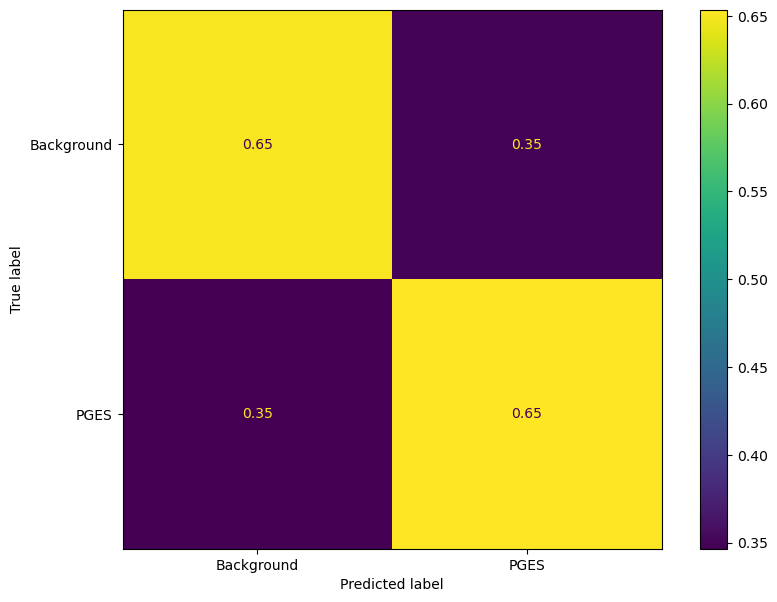

In [7]:
machine_learning().evaluate_classifier(clf = model, x = x_val, y = y_val, save_path = 'cm_val.png')

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     29392
           1       0.70      0.74      0.72      3696

    accuracy                           0.94     33088
   macro avg       0.84      0.85      0.84     33088
weighted avg       0.94      0.94      0.94     33088



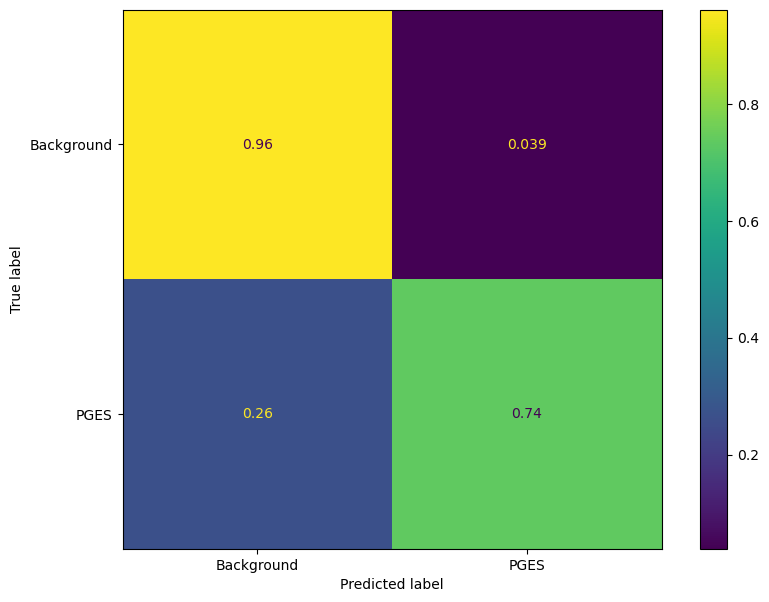

In [27]:
machine_learning().evaluate_classifier(clf = model, 
                                       x = MinMaxScaler().fit_transform(ref.iloc[:, 2:18]), 
                                       y = ref.pges, save_path = 'cm_ref_npc00.png')

# Consider that we are only ever going to have one session at a time, so let's test it that way instead

In [10]:
df.session.unique()

array([1, 2], dtype=int64)

In [11]:
df.subject.unique()

array([10,  5, 15], dtype=int64)

              precision    recall  f1-score   support

           0       0.96      0.27      0.42      2760
           1       0.04      0.74      0.08       118

    accuracy                           0.29      2878
   macro avg       0.50      0.50      0.25      2878
weighted avg       0.92      0.29      0.41      2878

              precision    recall  f1-score   support

           0       1.00      0.51      0.67     19612
           1       0.00      1.00      0.00        18

    accuracy                           0.51     19630
   macro avg       0.50      0.75      0.34     19630
weighted avg       1.00      0.51      0.67     19630

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      5788
           1       0.02      1.00      0.05        12

    accuracy                           0.91      5800
   macro avg       0.51      0.96      0.50      5800
weighted avg       1.00      0.91      0.95      5800

              preci

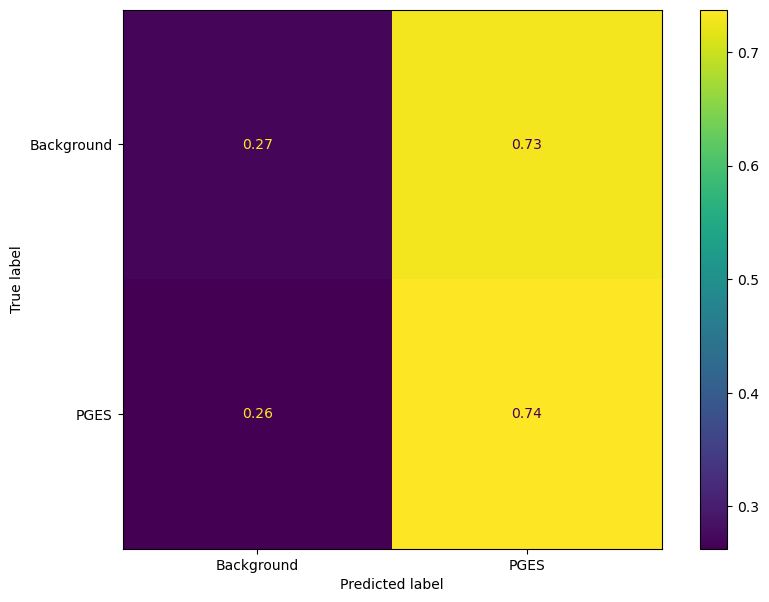

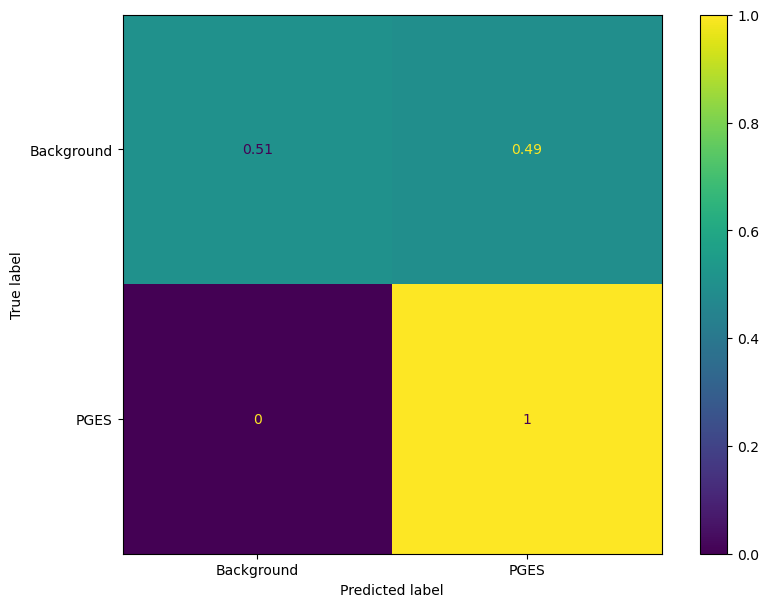

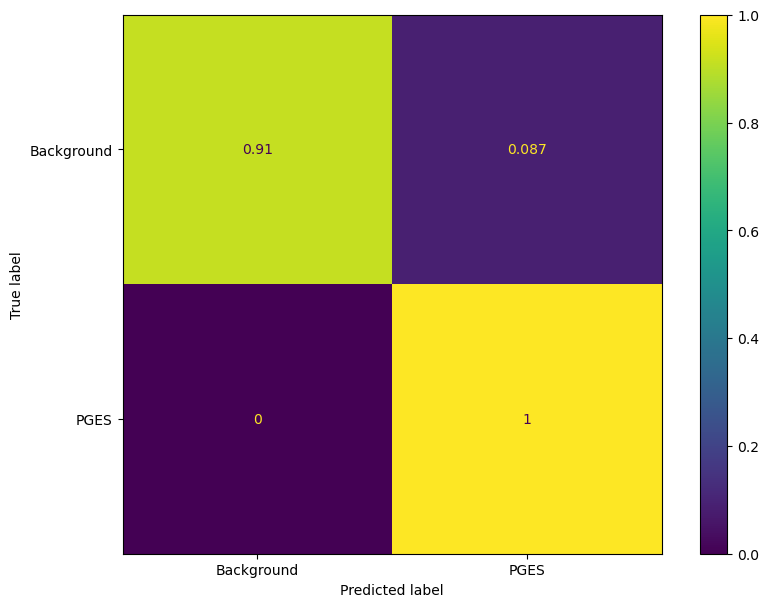

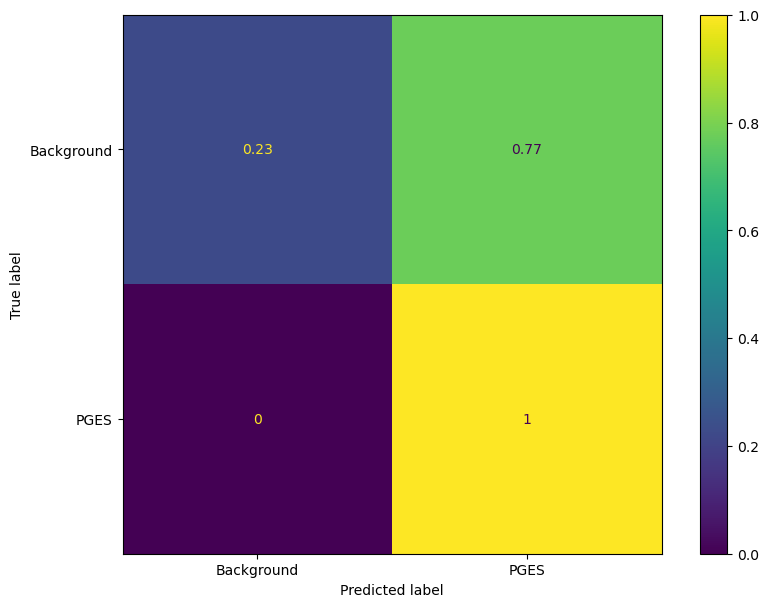

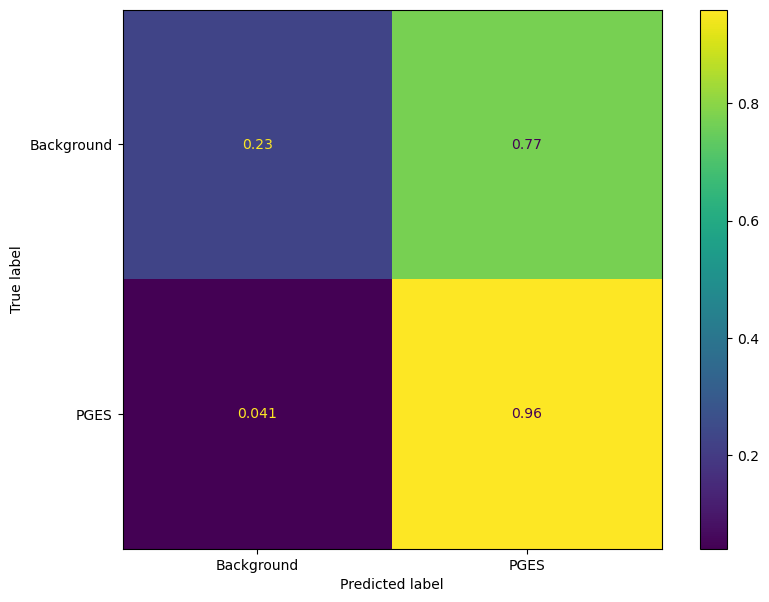

In [13]:
for sub in df.subject.unique():
    tmp_sub = df[df.subject == sub]
    for sesh in tmp_sub.session.unique():
        tmp_sesh = tmp_sub[tmp_sub.session == sesh]
        x = MinMaxScaler().fit_transform(tmp_sesh.iloc[:, 2:18])
        y = tmp_sesh.pges
        machine_learning().evaluate_classifier(clf = model, x = x, y = y, save_path = f'cm_val_{sub}_{sesh}.png')

# Maybe by subject?

              precision    recall  f1-score   support

           0       0.96      0.27      0.42      2760
           1       0.04      0.74      0.08       118

    accuracy                           0.29      2878
   macro avg       0.50      0.50      0.25      2878
weighted avg       0.92      0.29      0.41      2878

              precision    recall  f1-score   support

           0       1.00      0.60      0.75     25400
           1       0.00      1.00      0.01        30

    accuracy                           0.60     25430
   macro avg       0.50      0.80      0.38     25430
weighted avg       1.00      0.60      0.75     25430

              precision    recall  f1-score   support

           0       1.00      0.22      0.36      9928
           1       0.01      0.96      0.02        80

    accuracy                           0.23     10008
   macro avg       0.50      0.59      0.19     10008
weighted avg       0.99      0.23      0.36     10008



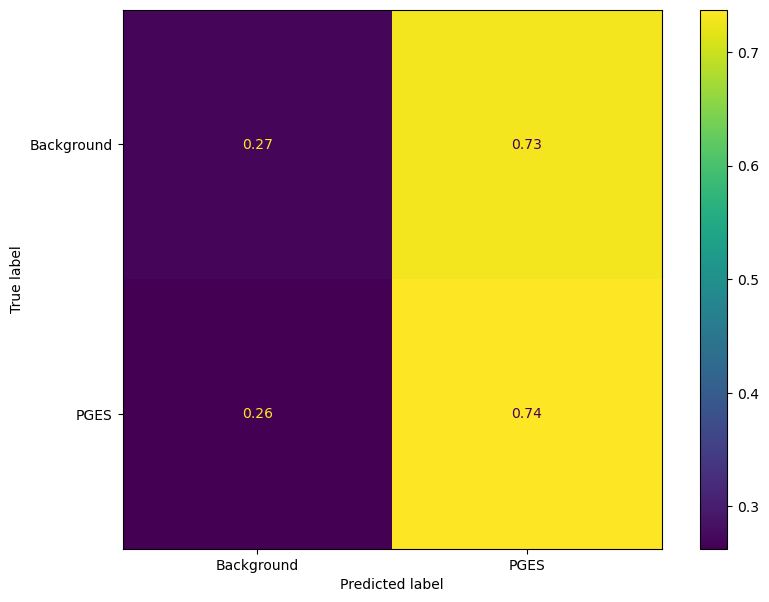

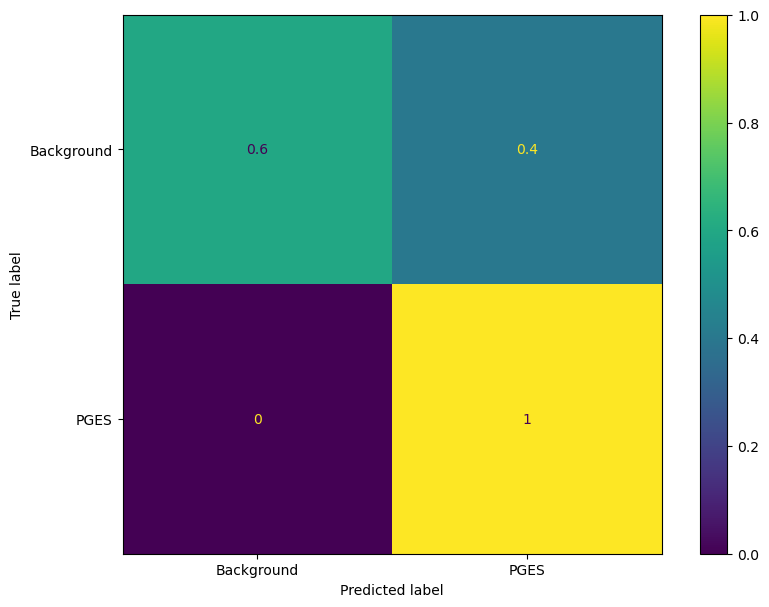

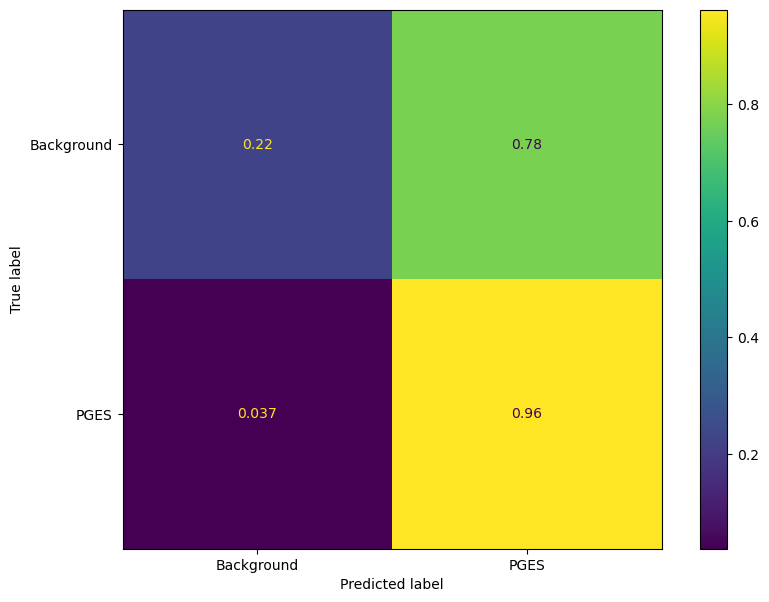

In [14]:
for sub in df.subject.unique():
    tmp_sub = df[df.subject == sub]
    x = MinMaxScaler().fit_transform(tmp_sub.iloc[:, 2:18])
    y = tmp_sub.pges
    machine_learning().evaluate_classifier(clf = model, x = x, y = y, save_path = f'cm_val_{sub}_tot.png')

# Comparison to normal

In [17]:
ref_test = ref[ref.subject.isin(['P1', 'P7', 'P16', 'P2', 'arq', 'aaq'])]
ref_test

,epoch,channel,median_amp,mean_amp,std_amp,max_amp,min_amp,range_amp,abs_psd_delta,rel_psd_delta,...,rel_psd_theta,abs_psd_alpha,rel_psd_alpha,abs_psd_beta,rel_psd_beta,pfd,svd_entropy,pges,subject,session
0,0,FP2-F8,0.000010,0.000012,0.000009,0.000040,1.329350e-07,0.000040,5.208090e-12,0.191276,...,0.039635,5.755831e-13,0.021139,1.544788e-13,0.005673,0.569566,2.934575,0,aaq,6.0
1,0,T4-F8,0.000005,0.000005,0.000003,0.000015,5.130469e-08,0.000015,2.228358e-12,0.119239,...,0.047518,4.747604e-13,0.025404,2.105636e-13,0.011267,0.587651,2.847412,0,aaq,6.0
2,1,FP2-F8,0.000011,0.000013,0.000009,0.000040,8.485578e-08,0.000040,9.065146e-12,0.240700,...,0.023694,6.086431e-13,0.016161,1.325314e-13,0.003519,0.570714,2.914631,0,aaq,6.0
3,1,T4-F8,0.000005,0.000005,0.000003,0.000014,1.863623e-08,0.000014,1.232138e-12,0.115955,...,0.038540,2.178675e-13,0.020503,1.367948e-13,0.012874,0.582885,2.746224,0,aaq,6.0
4,2,FP2-F8,0.000011,0.000013,0.000008,0.000036,8.485578e-08,0.000036,4.393930e-11,0.266820,...,0.030812,7.622206e-13,0.004629,1.386361e-13,0.000842,0.573346,2.972456,0,aaq,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32925,49,T8-F8,0.000010,0.000014,0.000012,0.000057,1.233916e-07,0.000056,2.472201e-11,0.183034,...,0.025810,1.049379e-12,0.007769,1.719256e-12,0.012729,0.600593,3.021847,0,P7,3.0
32926,50,Fp2-F8,0.000012,0.000015,0.000011,0.000055,1.240013e-07,0.000055,1.715825e-11,0.173991,...,0.027121,6.314925e-13,0.010079,7.189734e-13,0.013766,0.576401,2.798055,0,P7,3.0
32927,50,T8-F8,0.000016,0.000017,0.000012,0.000059,4.092730e-08,0.000059,4.697829e-11,0.171695,...,0.016018,6.314925e-13,0.005465,2.631409e-12,0.009617,0.598462,2.942317,0,P7,3.0
32928,51,Fp2-F8,0.000012,0.000055,0.000042,0.000244,4.092730e-08,0.000244,1.715825e-11,0.187345,...,0.025827,6.314925e-13,0.004729,7.189734e-13,0.010904,0.573100,2.782356,0,P7,3.0


              precision    recall  f1-score   support

           0       1.00      0.49      0.66      1236
           1       0.00      0.00      0.00         0

    accuracy                           0.49      1236
   macro avg       0.50      0.24      0.33      1236
weighted avg       1.00      0.49      0.66      1236

              precision    recall  f1-score   support

           0       1.00      0.47      0.64      1328
           1       0.00      0.00      0.00         0

    accuracy                           0.47      1328
   macro avg       0.50      0.23      0.32      1328
weighted avg       1.00      0.47      0.64      1328

              precision    recall  f1-score   support

           0       1.00      0.20      0.34       420
           1       0.00      0.00      0.00         0

    accuracy                           0.20       420
   macro avg       0.50      0.10      0.17       420
weighted avg       1.00      0.20      0.34       420

              preci

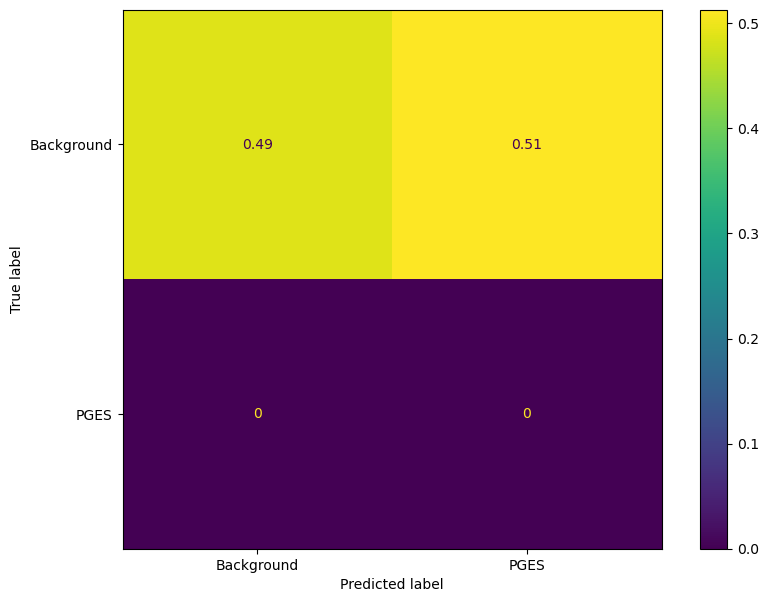

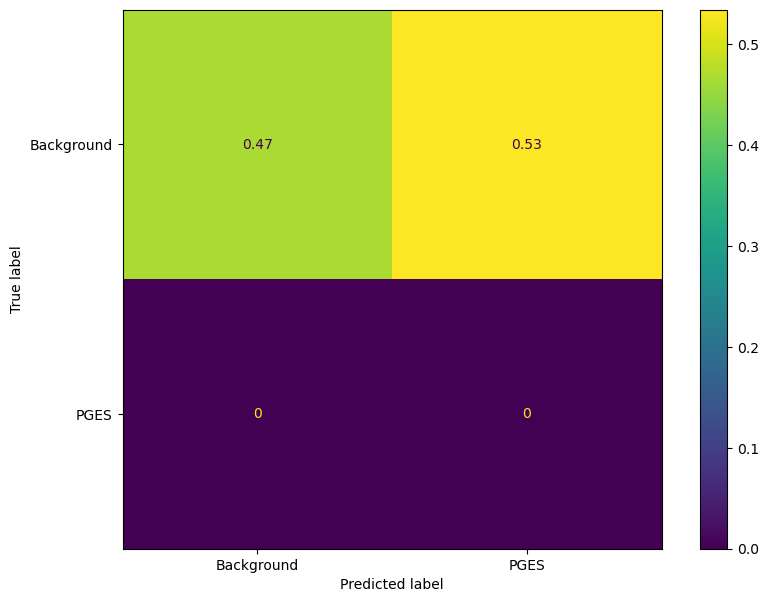

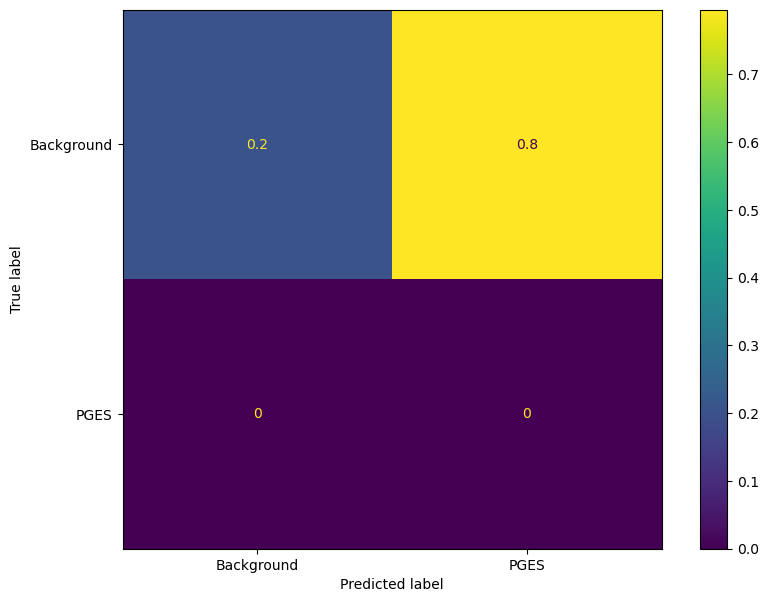

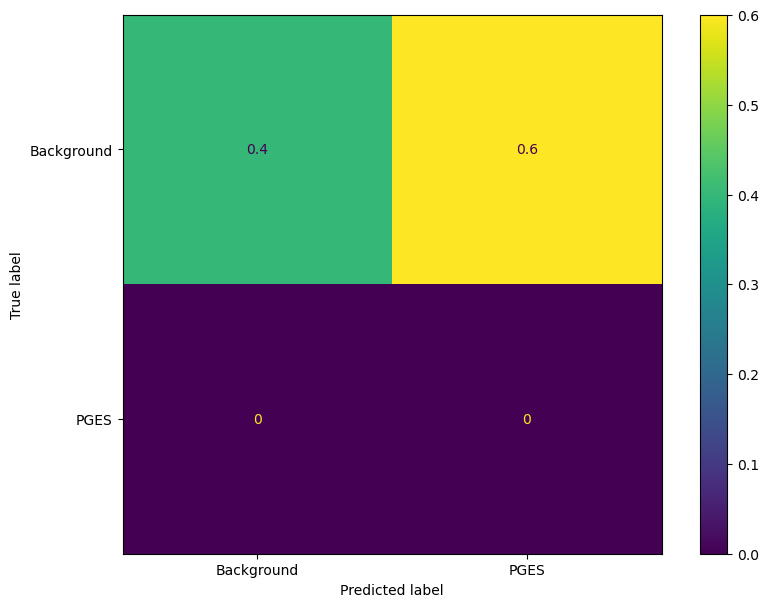

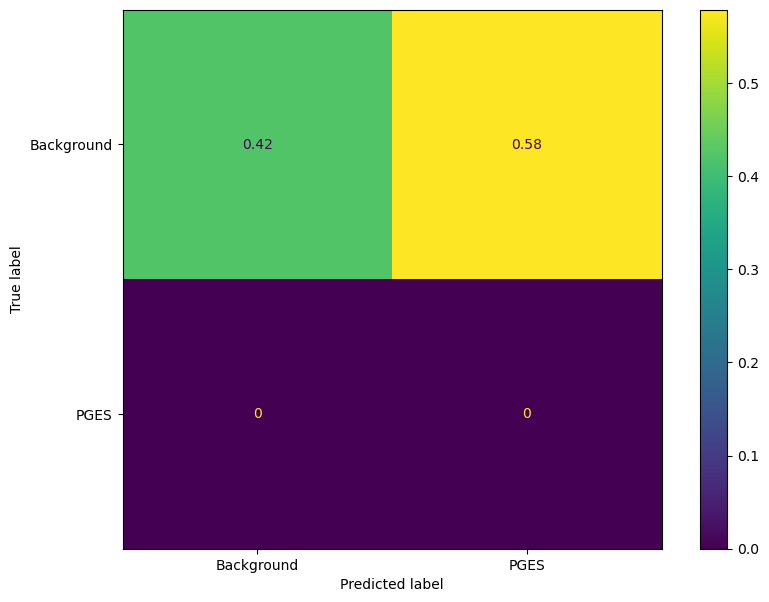

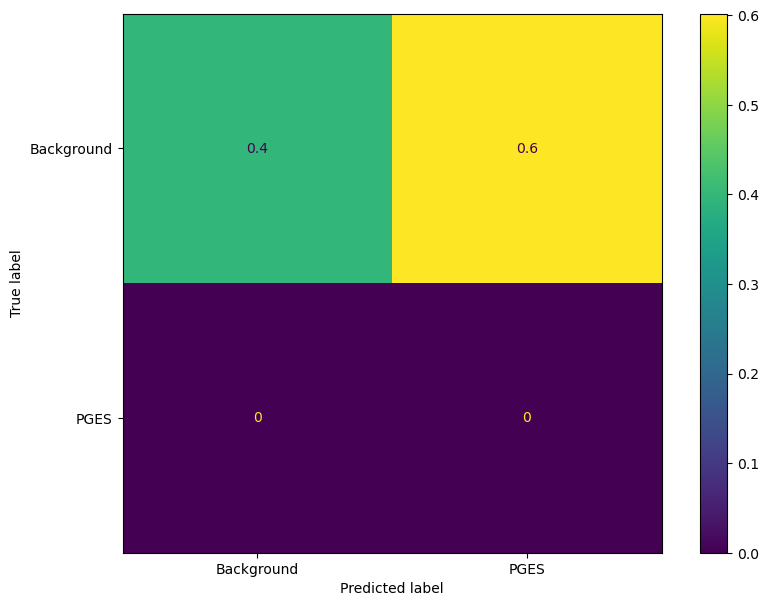

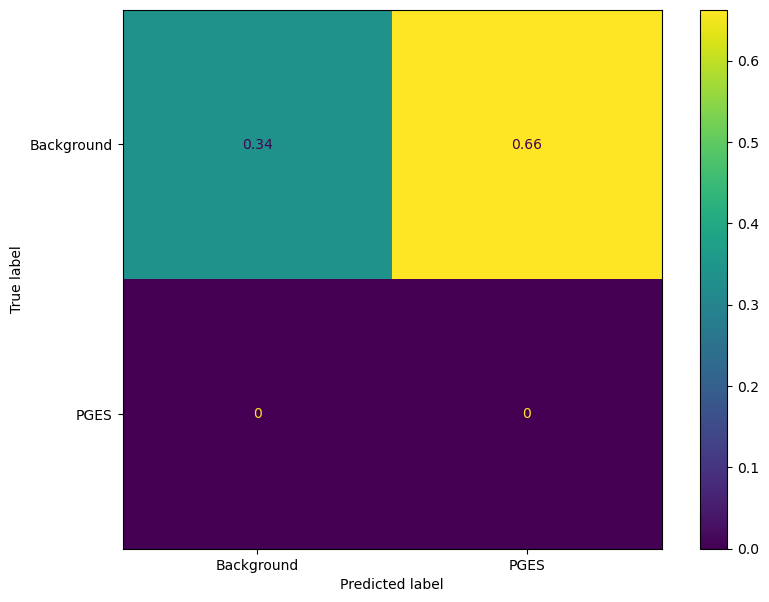

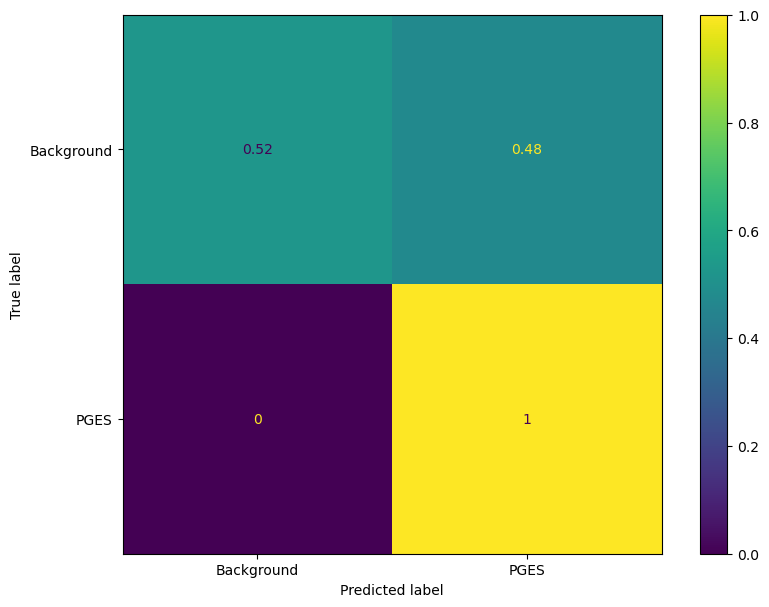

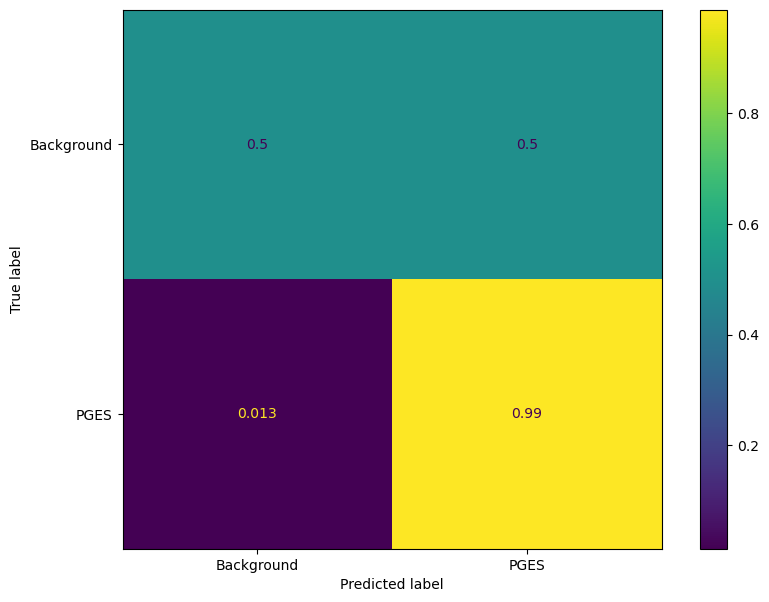

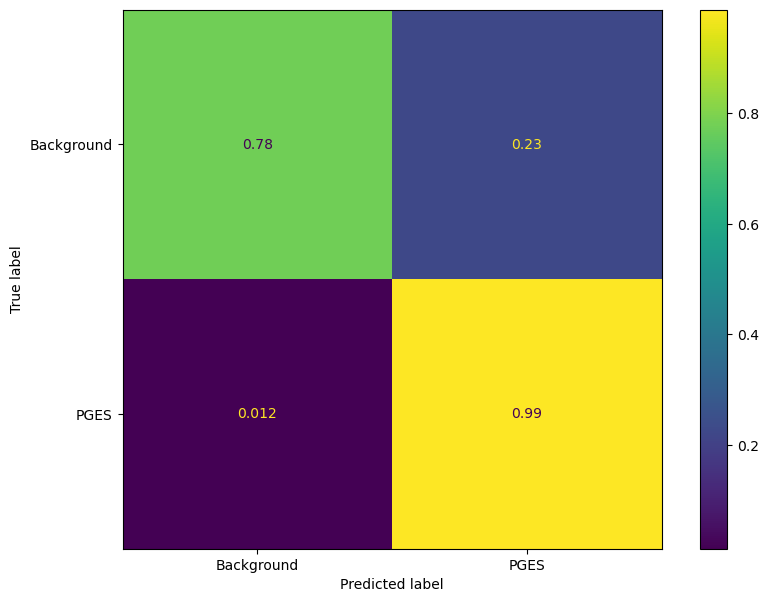

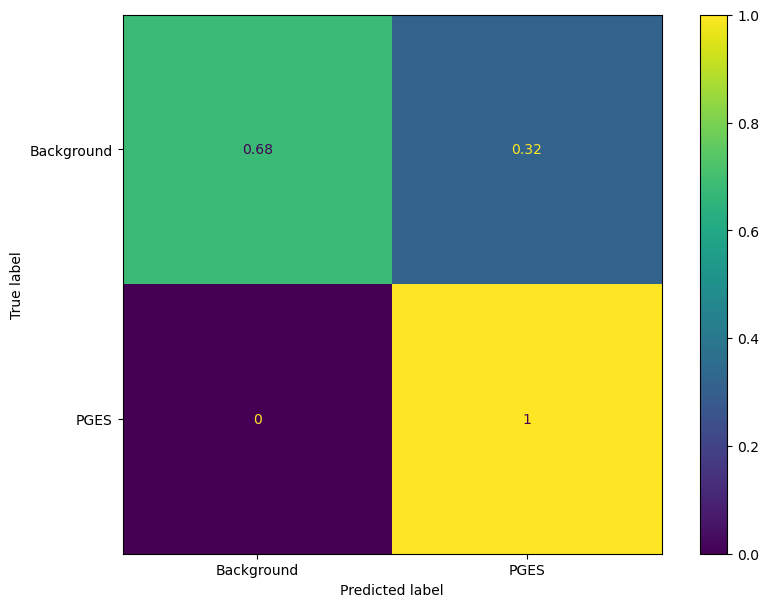

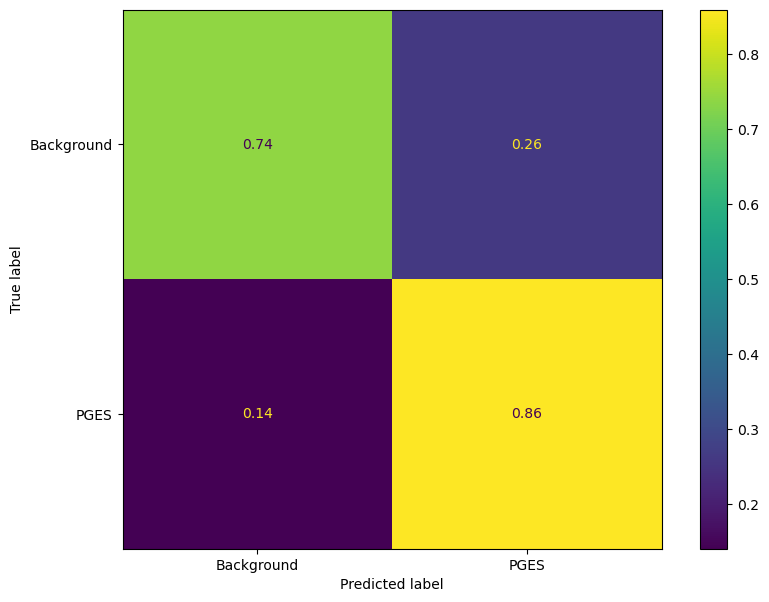

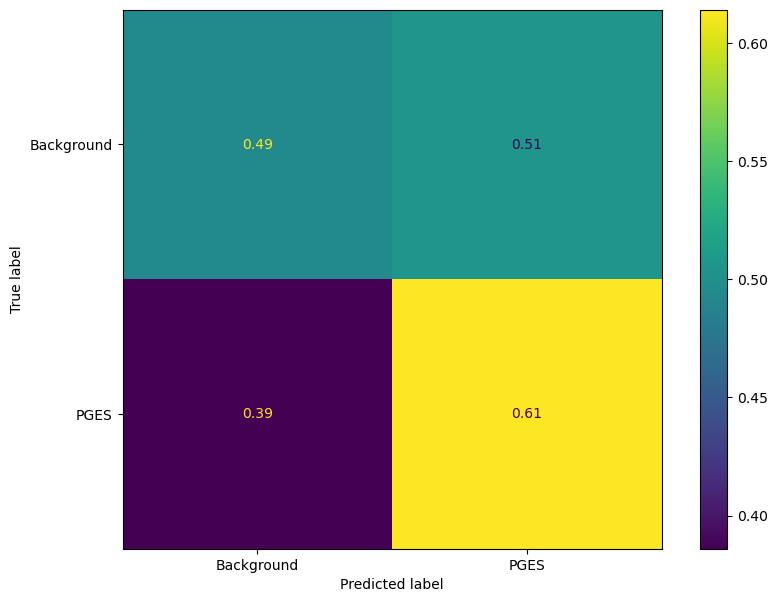

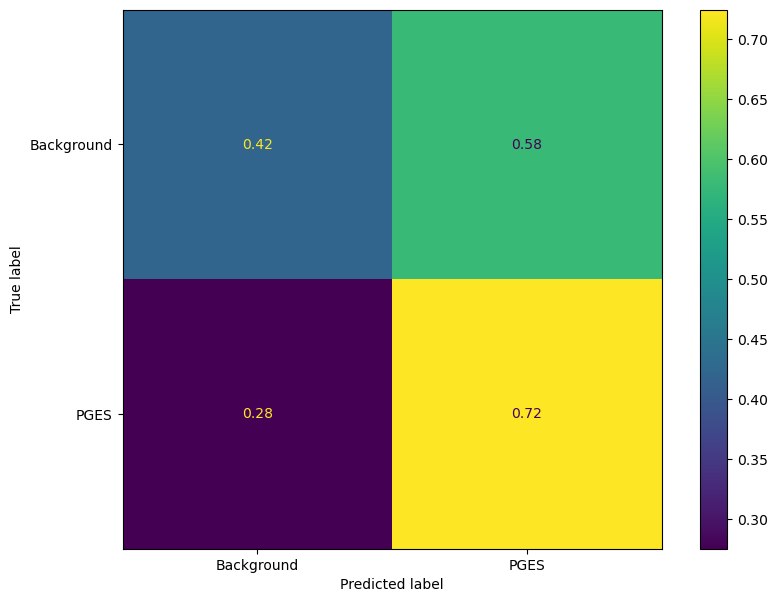

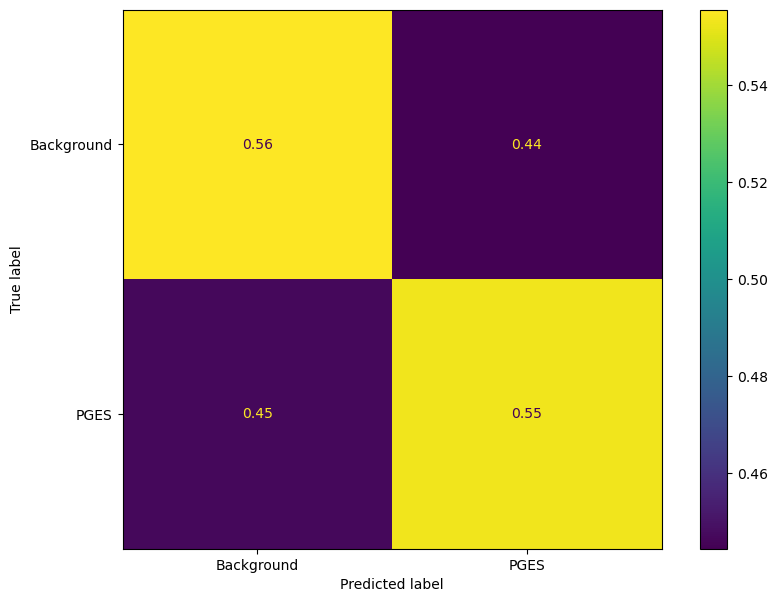

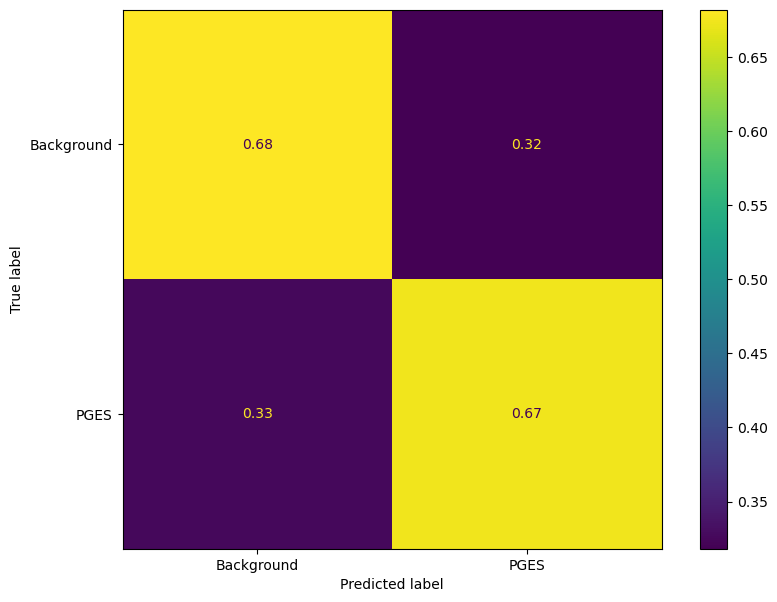

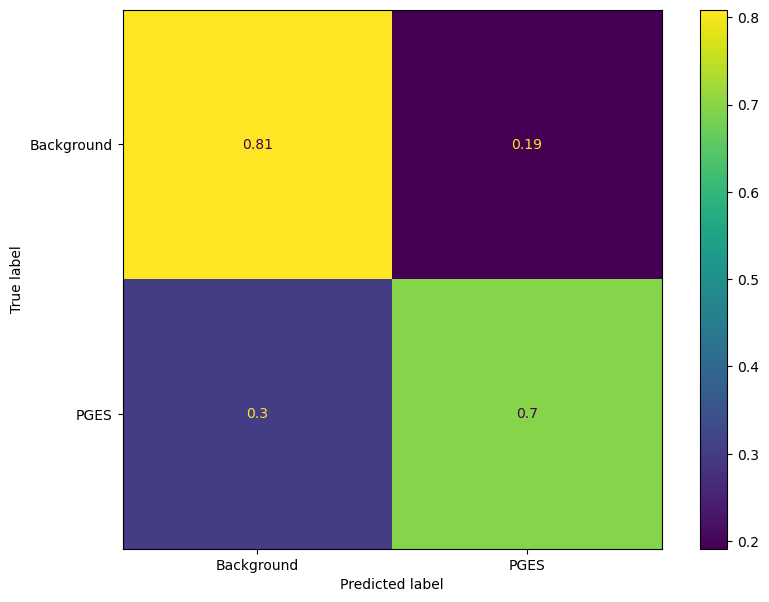

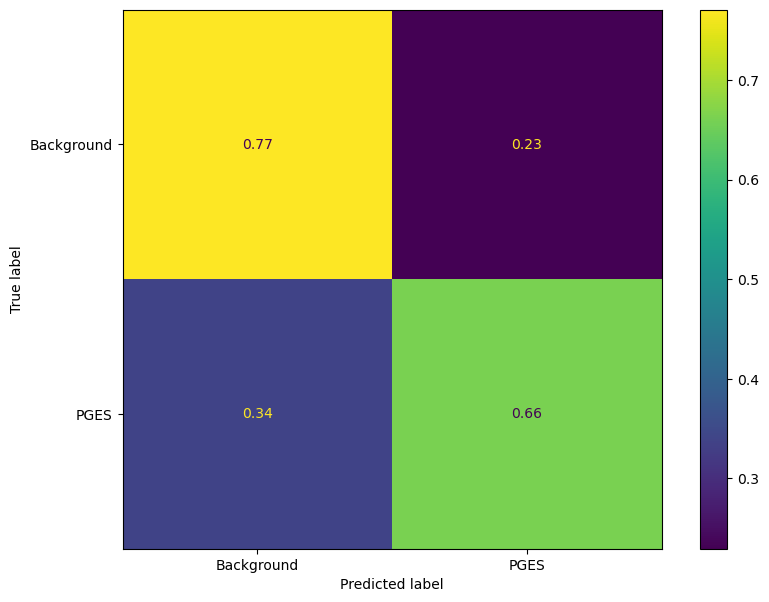

In [18]:
for sub in ref_test.subject.unique():
    tmp_sub = ref_test[ref_test.subject == sub]
    for sesh in tmp_sub.session.unique():
        tmp_sesh = tmp_sub[tmp_sub.session == sesh]
        x = MinMaxScaler().fit_transform(tmp_sesh.iloc[:, 2:18])
        y = tmp_sesh.pges
        machine_learning().evaluate_classifier(clf = model, x = x, y = y, save_path = f'cm_{sub}_{sesh}.png')

              precision    recall  f1-score   support

           0       1.00      0.40      0.57      2984
           1       0.00      0.00      0.00         0

    accuracy                           0.40      2984
   macro avg       0.50      0.20      0.29      2984
weighted avg       1.00      0.40      0.57      2984

              precision    recall  f1-score   support

           0       1.00      0.38      0.56     10608
           1       0.00      0.00      0.00         0

    accuracy                           0.38     10608
   macro avg       0.50      0.19      0.28     10608
weighted avg       1.00      0.38      0.56     10608

              precision    recall  f1-score   support

           0       0.99      0.62      0.76       300
           1       0.75      0.99      0.85       340

    accuracy                           0.82       640
   macro avg       0.87      0.81      0.81       640
weighted avg       0.86      0.82      0.81       640

              preci

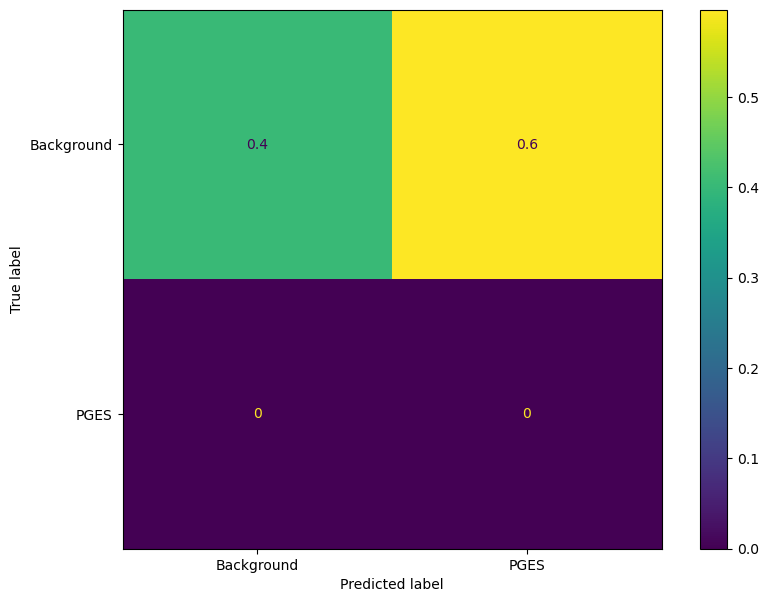

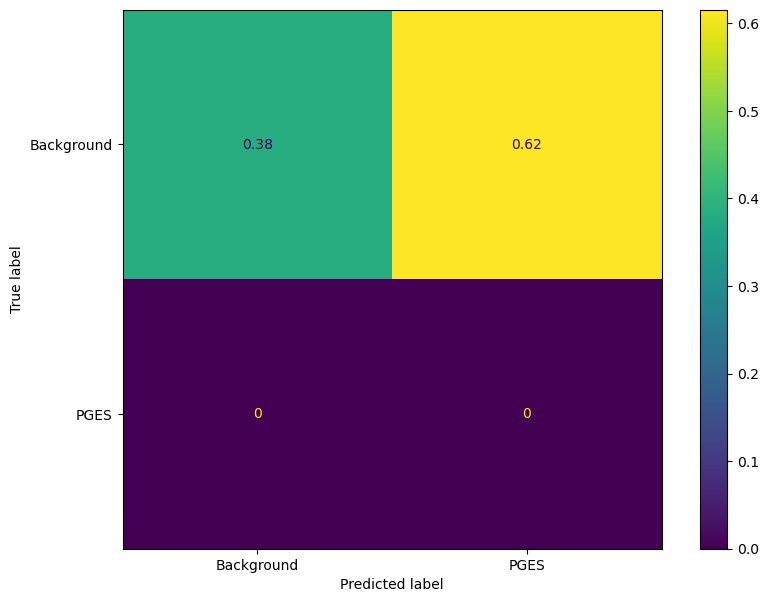

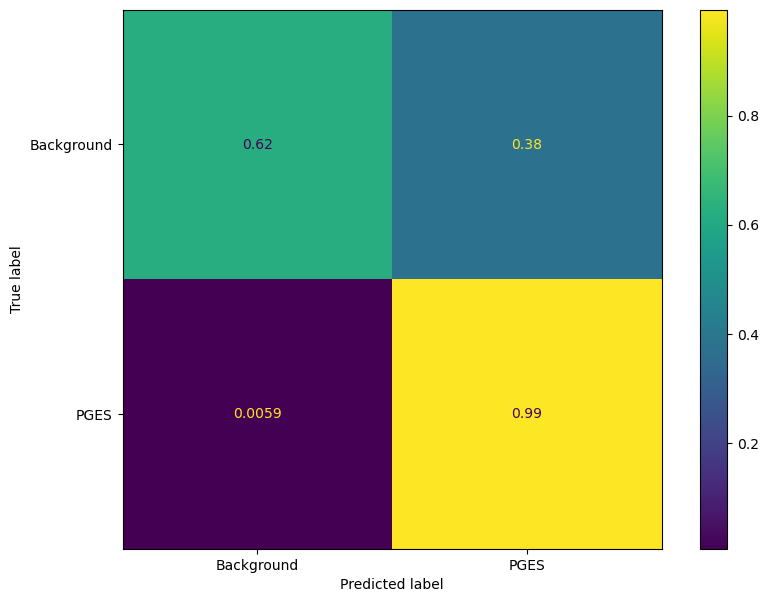

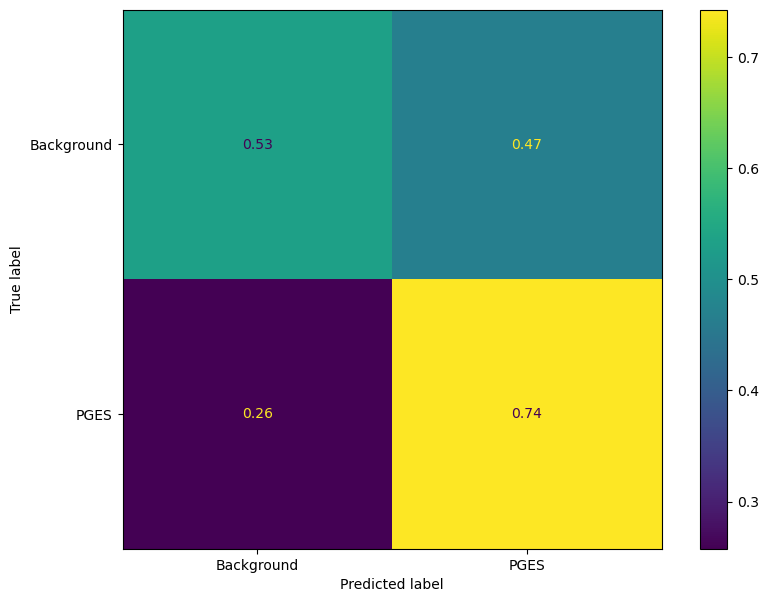

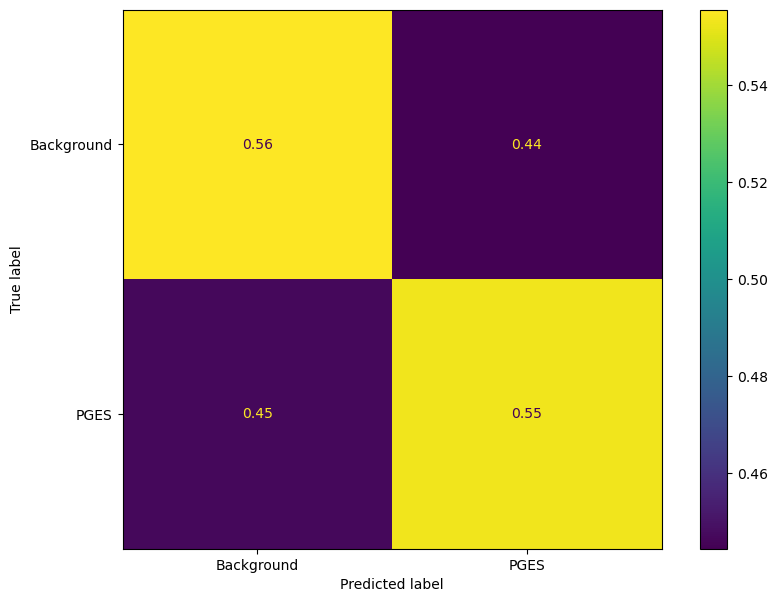

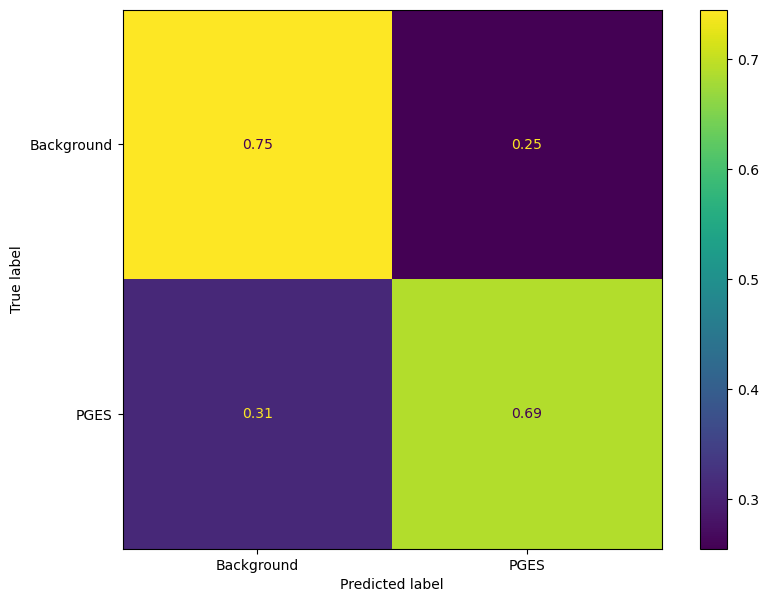

In [19]:
for sub in ref_test.subject.unique():
    tmp_sub = ref_test[ref_test.subject == sub]
    x = MinMaxScaler().fit_transform(tmp_sub.iloc[:, 2:18])
    y = tmp_sub.pges
    machine_learning().evaluate_classifier(clf = model, x = x, y = y, save_path = f'cm_{sub}_tot.png')

# This could be down to the value-based features. Investigate the features in another notebook